In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [2]:
url = "https://raw.githubusercontent.com/ravardh/Database-sample-Files/main/diabetes.csv"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X=df.drop(columns=['Outcome'])
Y=df['Outcome']


In [4]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
X_train,X_test , Y_train,Y_test= TTS(X,Y,test_size=0.30,random_state=0) 

In [6]:
model = LOR(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [7]:
Y_pred = model.predict(X_test)

In [8]:
DF_test_predict = X_test
DF_test_predict["Y_test"] = Y_test
DF_test_predict["Y_pred"] = Y_pred
DF_test_predict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y_test,Y_pred
661,1,199,76,43,0,42.9,1.394,22,1,1
122,2,107,74,30,100,33.6,0.404,23,0,0
113,4,76,62,0,0,34.0,0.391,25,0,0
14,5,166,72,19,175,25.8,0.587,51,1,1
529,0,111,65,0,0,24.6,0.660,31,0,0
...,...,...,...,...,...,...,...,...,...,...
165,6,104,74,18,156,29.9,0.722,41,1,0
188,8,109,76,39,114,27.9,0.640,31,1,0
334,1,95,60,18,58,23.9,0.260,22,0,0
758,1,106,76,0,0,37.5,0.197,26,0,0


In [9]:
CM = confusion_matrix(Y_test,Y_pred)
AS = accuracy_score(Y_test,Y_pred)
RS= recall_score(Y_test,Y_pred)
PS = precision_score(Y_test,Y_pred)
F1 = f1_score(Y_test,Y_pred)
print(f"Accuracy Score = {AS}\nPrecision Score = {PS}\nRecall Score = {RS}\nF1 Score = {F1}")

Accuracy Score = 0.7792207792207793
Precision Score = 0.7090909090909091
Recall Score = 0.527027027027027
F1 Score = 0.6046511627906976


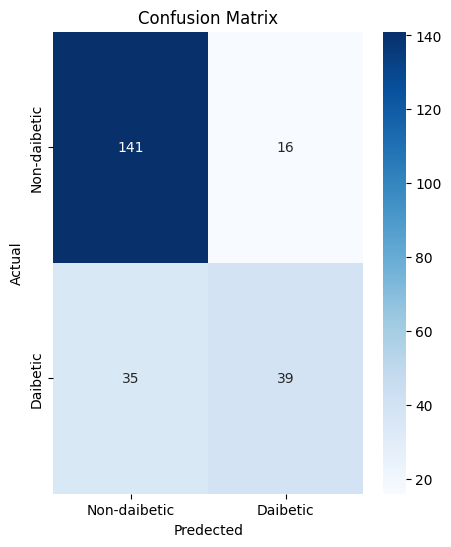

In [11]:
plt.figure(figsize=(5,6))
sns.heatmap(CM,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Non-daibetic','Daibetic'],
            yticklabels=['Non-daibetic','Daibetic']
           )
plt.xlabel('Predected')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()